<a href="https://colab.research.google.com/github/Obasi042/Bank-App/blob/main/wls_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

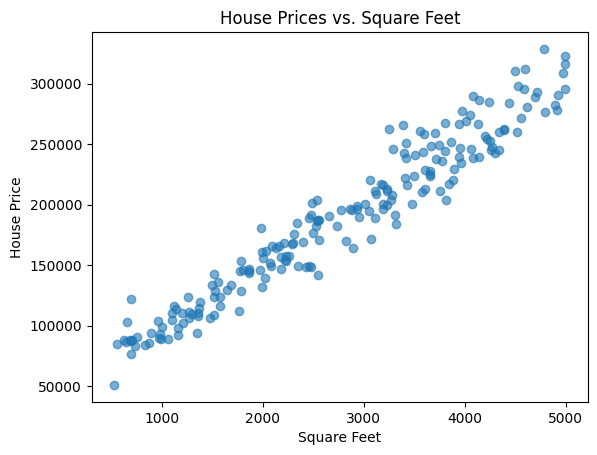

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 200  # Number of houses
square_feet = np.random.randint(500, 5000, n)  # Random square footage between 500 and 5000
base_price = 50000 + 50 * square_feet  # Base price formula

# Introduce heteroskedasticity: price variation increases with house size
error = np.random.normal(0, 10000 + 2 * square_feet, n)  # Larger houses have more price variability
price = base_price + error  # Actual price

# Create DataFrame
data = pd.DataFrame({'SquareFeet': square_feet, 'Price': price})

# Plot the data
plt.scatter(data['SquareFeet'], data['Price'], alpha=0.6)
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.title('House Prices vs. Square Feet')
plt.show()


In [2]:
# Add a constant (intercept term)
data['Intercept'] = 1

# Fit OLS model
ols_model = sm.OLS(data['Price'], data[['Intercept', 'SquareFeet']]).fit()

# Print summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3080.
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.24e-122
Time:                        10:52:26   Log-Likelihood:                -2220.1
No. Observations:                 200   AIC:                             4444.
Df Residuals:                     198   BIC:                             4451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.733e+04   2791.591     16.956      0.0

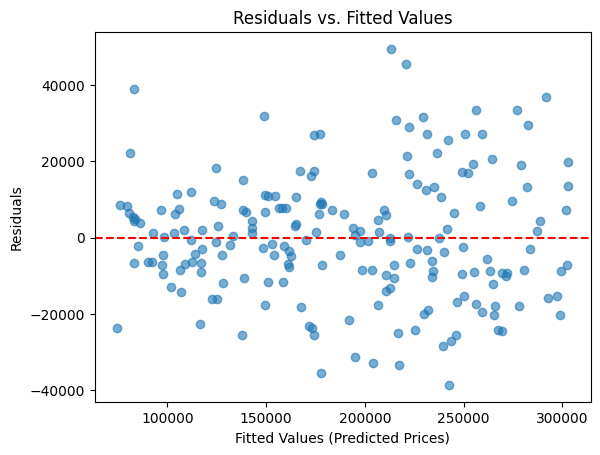

In [3]:
# Get residuals and fitted values
data['Residuals'] = ols_model.resid
data['FittedValues'] = ols_model.fittedvalues

# Plot residuals vs. fitted values
plt.scatter(data['FittedValues'], data['Residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


In [4]:
# Fit an OLS model for absolute residuals vs. fitted values
abs_resid_model = sm.OLS(np.abs(data['Residuals']), sm.add_constant(data['FittedValues'])).fit()

# Compute estimated standard deviation (proxy for variance)
data['EstimatedStdDev'] = abs_resid_model.fittedvalues

# Compute weights (inverse of variance)
data['Weights'] = 1 / (data['EstimatedStdDev'] ** 2)


In [5]:
# Fit WLS model
wls_model = sm.WLS(data['Price'], data[['Intercept', 'SquareFeet']], weights=data['Weights']).fit()

# Print summary
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.945
Model:                            WLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3434.
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.81e-127
Time:                        10:56:40   Log-Likelihood:                -2213.9
No. Observations:                 200   AIC:                             4432.
Df Residuals:                     198   BIC:                             4438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.812e+04   2142.721     22.457      0.0

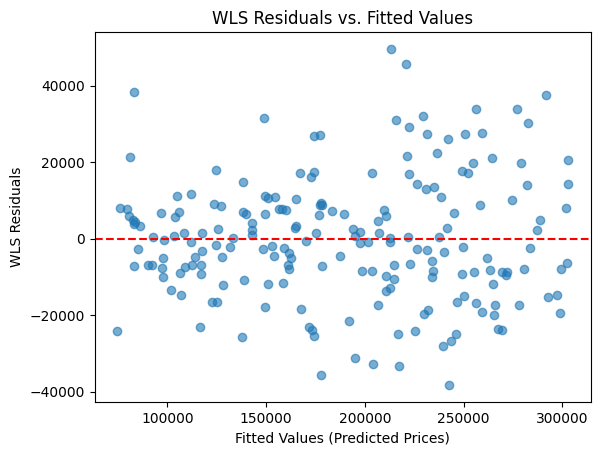

In [6]:
# Get WLS residuals
data['WLS_Residuals'] = wls_model.resid

# Plot WLS residuals vs. fitted values
plt.scatter(data['FittedValues'], data['WLS_Residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('WLS Residuals')
plt.title('WLS Residuals vs. Fitted Values')
plt.show()
